# Project: Wrangling and Analyze Data

## Table of Contents
<a id="toc"></a>
<ul>
<li><a href="#import">Import</a></li>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#explore">Analyzing and Visualizing Data</a></li>
</ul>

## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
import requests
from timeit import default_timer as timer
%matplotlib inline

<a id='Gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
dfCsv1=pd.read_csv('twitter-archive-enhanced.csv')
dfCsv1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
URL="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req=requests.get(URL)
with open("image-predictions.tsv", mode="wb") as file:
    file.write(req.content)
dfTsv=pd.read_csv("image-predictions.tsv", sep='\t')
dfTsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) </br>
3 .1. retrieve data from tweeter

In [4]:
##Twitter API code was sent to this student from a Udacity instructor with some necessar changes
"""
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = dfCsv.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

'\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n\ntweet_ids = dfCsv.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n    

In [5]:
with open("tweet_json.txt") as file:
    df_tweets = pd.DataFrame((json.loads(line) for line in file), columns = ['id', 'favorite_count', 'retweet_count'])
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Let's check the three datasets in general

In [6]:
dfCsv1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
dfCsv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


There are reweets data in the CSV files. Per the description, retweets does not contain images. Hence we can retrieve the set of tweet ids which are listed in the CSV and not listed in the TSV then remove their entries from CSV file

In [8]:
dfCsv=dfCsv1.copy()
tweetsIds=dfTsv.tweet_id.tolist()
for i in range (0, len(dfCsv)-1):
    if dfCsv1.iloc[i]['tweet_id'] not in tweetsIds:
        dfCsv.drop(i, inplace=True)

In [9]:
dfCsv.shape

(2075, 17)

In [10]:
dfCsv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


We can notice that the five top listed dogs in the head() output have are not classified. The values for the columns: doggo, floofer, puppoer and puppo are 'None'.
Let's check deeper

In [11]:
dfClassNone=dfCsv.query('doggo=="None" & floofer=="None" & pupper=="None" & puppo=="None"')
dfClassNone.shape[0]

1754

In [12]:
dfCsv.shape[0]

2075

There are several entries (mre than 2/3) of dogs in the dataset without classsification. </br>
Let's check if there are dogs with 2 or more classification

In [13]:
dfSeveralClass=dfCsv.copy()
c=0
dfSeveralClass["class"]=''
for i in range(0, len(dfSeveralClass)-1):
    if dfSeveralClass.iloc[i]['doggo'] !="None":
        c+=1
    if dfSeveralClass.iloc[i]['floofer'] !="None":
        c+=1
    if dfSeveralClass.iloc[i]['pupper'] !="None":
        c+=1
    if dfSeveralClass.iloc[i]['puppo'] !="None":
        c+=1
    #dfSeveralClass.iloc[i]['class']=c
    dfSeveralClass.loc[dfSeveralClass.index[i], 'class'] = c
    c=0
#dfSeveralClass.head()    
dfSeveralClass['class'].value_counts()

0    1753
1     308
2      13
        1
Name: class, dtype: int64

There are 13 entries with double classsifed dogs. To remediate this we can replace the 4 columns of different classificatons to one column 'classification'</b>
Let's check general info of the dataset

In [14]:
dfCsv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

We can notice that some columns like "in_reply_to_status_id" have missing data. Also, timestamp columns have wrong Type. They are entered as strings instead of timestamps</br>
Let's check if there are some duplicated data

In [15]:
sum(dfCsv.duplicated())

0

Let's check the general statiscs of the dataset

In [16]:
dfCsv.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.075000e+03,2.300000e+01,2.300000e+01,2075,2075,2075,8.100000e+01,8.100000e+01,81,2075,2075.000000,2075.000000,2075,2075,2075,2075,2075
unique,NaN,NaN,NaN,2075,3,2075,NaN,NaN,81,2075,NaN,NaN,936,2,2,2,2
top,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/892420643...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2034,1,NaN,NaN,1,1,NaN,NaN,578,1995,2067,1853,2051
mean,7.384514e+17,6.978112e+17,4.196984e+09,NaN,NaN,NaN,7.678895e+17,9.721754e+15,NaN,NaN,12.266024,10.511325,NaN,NaN,NaN,NaN,NaN
std,6.785203e+16,4.359384e+16,0.000000e+00,NaN,NaN,NaN,5.962520e+16,8.749575e+16,NaN,NaN,40.680299,7.177072,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,NaN,6.675094e+17,7.832140e+05,NaN,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,6.764835e+17,6.732411e+17,4.196984e+09,NaN,NaN,NaN,7.128090e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.119988e+17,6.757073e+17,4.196984e+09,NaN,NaN,NaN,7.798343e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.932034e+17,7.031489e+17,4.196984e+09,NaN,NaN,NaN,8.071068e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


The denominator shall be always 10 but it does not seems to be the case. 

In [17]:
dfCsv.rating_denominator.value_counts()

10     2057
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

There different denominators whose values ae from 2 to 170. The denominators is normally 10. However, we have minimal values like 2-7 and maximal values like 170. Minimal values shall be exluded. Maximal values shall be rechecked</br> 
Let's check if some numerators < denominators

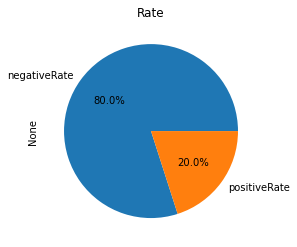

In [18]:
NegativeRating=dfCsv.rating_numerator < dfCsv.rating_denominator
def pieChart(title,entry,labelsList,figsize):
    entry.plot(kind='pie',autopct='%1.1f%%', labels=labelsList,figsize=figsize)
    plt.title(title)
    plt.show
counts=NegativeRating.value_counts()
labels=['negativeRate','positiveRate']
pieChart(title='Rate',entry=counts, labelsList=labels,figsize=(4,4))

The negative rating percentage is very high 80%. This is unexpected.WeRateDogs is popular because the rate is higher than the denominator </br>
Let's check the dataset retrieved by requests

In [19]:
dfTsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Let's check general description of the dataset

In [20]:
dfTsv.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


We can notice that there only 2009 unique jjpg_url. Then we could have duplicated images. Let's check for duplicated entries in jpg_url level

In [21]:
sum(dfTsv.jpg_url.duplicated())

66

There are 66 duplicated images

Let's check the dataset retrived by the API

In [22]:
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [23]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
df_tweets.shape

(2354, 3)

The three datasets do not share the same size

### Quality issues
1. More Than 2/3 of the dogs in the dataset are not classified

2. There are some dogs with 2 different classification

3. There are some missing values in the dataset 

4. Timestamp's data type shall be altered from object to datetime 

5. Some denominator values are 0-2-7 to be cleared

6. We expected that the rating of WeDogsRate is always positive. However a high rate is negative

7. Column names in tweet image predictions is not meaningful
8. There are duplicaed images

### Tidiness issues
1. 4 classsification colmuns that can be replaced to one column as the dog shall belong to only one category

2. We need to merge the 3 datasets together

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
dfCsv2=dfCsv.copy()
dfTsv2=dfTsv.copy()
dfTweeets2=df_tweets.copy()

### Issue #1:

#### Define: Merge the 3 datasets
1. Merge dfCsv2 with dfTsv2. 
2. Rename id of df_tweets 
3. Add dfTweets.
4. Check null entries

#### Code

In [26]:
df1=pd.merge(dfCsv2, dfTsv2, on ='tweet_id')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [27]:
dfTweeets2.rename(columns={"id":"tweet_id"}, inplace=True)
dfTweeets2.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [28]:
df2=pd.merge(df1, dfTweeets2, on ='tweet_id')

#### Test

In [29]:
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #2-3 -4 :
1. 4 classsification colmuns that can be replaced to one column as the dog shall belong to only one category
2. More Than 2/3 of the dogs in the dataset are not classified
3. There are some dogs with 2 different classification

#### Define 
1. Retrive the classification from text column
2. create a classification column
3. drop 'doggo','floofer','pupper','puppo' columns

#### Code

In [31]:
c=['doggo','floofer','pupper','puppo']
for i in range(0, len(df2)-1):
    for j in c:
        if j in str(df2.loc[i,'text']).lower():
            df2.loc[i,'classification']=j.title()

In [32]:
df2.drop(['doggo','floofer','pupper','puppo'],axis=1, inplace=True)

#### Test

In [33]:
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,classification
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,NaN


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  jpg_url                     2073 

We can notice several missing entries in classification column. We will enter manually a value.

### Issue #5:
Several missing entries in the dataset (e.g in classification column)

#### Define 
Replace empty classification with a value

#### Code

In [35]:
df2.classification.describe(include='all')

count        356
unique         4
top       Pupper
freq         246
Name: classification, dtype: object

We will assign to missing values the top value 'Pupper'

In [36]:
df2.classification.fillna("Pupper", inplace = True)

#### Test

In [37]:
df2.classification.describe(include='all')

count       2073
unique         4
top       Pupper
freq        1963
Name: classification, dtype: object

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  jpg_url                     2073 

### Issue #6:
Timestamp's data type shall be altered from object to datetime

#### Define 
set timestamp data type to datetime

#### Code

In [39]:
df2.timestamp = pd.to_datetime(df2.timestamp)

In [40]:
df2.retweeted_status_timestamp =pd.to_datetime(df2.retweeted_status_timestamp)

#### Test

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     datetime64[ns, UTC]
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

In [42]:
df2.timestamp.dtypes

datetime64[ns, UTC]

In [43]:
df2.retweeted_status_timestamp.dtypes

datetime64[ns, UTC]

### Issue #7:
Some denominator values are 2-7 to be cleared

#### Define 
remove denominators values: 2-7

#### Code

In [44]:
lowDen=df2[df2.rating_denominator<10].index
lowDen

Int64Index([415, 2052], dtype='int64')

In [45]:
df2.rating_denominator.value_counts()

10     2055
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [46]:
df2.drop(index = [415, 2052],inplace=True)

#### Test

In [47]:
df2.rating_denominator.value_counts()

10     2055
50        3
11        2
80        2
70        1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
Name: rating_denominator, dtype: int64

In [48]:
lowDen=df2[df2.rating_denominator<10].index
lowDen

Int64Index([], dtype='int64')

### Issue #8:
We expected that the rating of WeDogsRate is always positive. However 80% of the rate is negative

#### Define
1. Have a general look at the dataframe with negative rating
2. Decide how to deal with negative rating

#### Code

In [49]:
NegativeRating=df2[df2.rating_numerator < df2.rating_denominator]
NegativeRating[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
40,5,10
185,6,10
249,0,10
588,5,10
615,3,10
659,7,10
675,8,10
683,9,10
696,8,10
718,4,10


Rating_numerator is very low meanwhile rating denomonator is the set one 10 </br>
We can add 10 to the rating_numerator and check the behaviour

In [50]:
indexes=NegativeRating.index
for i in indexes:
    df2.loc[i,'rating_numerator']+= 10

#### Test

In [51]:
NegativeRating=df2[df2.rating_numerator < df2.rating_denominator]
NegativeRating[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator
967,14,20


#### Code

In [52]:
df2.loc[967,'rating_denominator']=10

#### Test

In [53]:
NegativeRating=df2[df2.rating_numerator < df2.rating_denominator]
NegativeRating[['rating_numerator','rating_denominator']].head(10)

,rating_numerator,rating_denominator


#### Code

### Issue #9:
Column names in tweet image predictions is not meaningful

#### Define
change the column names of the dataset to be more meaninful

#### Code

In [54]:
df2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'classification'],
      dtype='object')

In [55]:
df2.columns=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'img_url', 'img_num', '_1stPrediction', '_1stPredictionConfidence',
       '_1stPredictionDog', '_2ndPrediction', '_2ndPredictionConfidence', '_2ndPredictiondog', '_3rdPrediction', '_3rdPredictionConfidence', '_rdPredictiondog',
       'favorite_count', 'retweet_count', 'classification']

#### Test

In [56]:
df2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'img_url', 'img_num', '_1stPrediction',
       '_1stPredictionConfidence', '_1stPredictionDog', '_2ndPrediction',
       '_2ndPredictionConfidence', '_2ndPredictiondog', '_3rdPrediction',
       '_3rdPredictionConfidence', '_rdPredictiondog', 'favorite_count',
       'retweet_count', 'classification'],
      dtype='object')

### Issue #10:
There are duplicaed images

#### Define
Remove deplucated images entries

#### Code

In [57]:
indexes=df2[df2.img_url.duplicated()].index
indexes

Int64Index([ 103,  282,  288,  306,  333,  335,  357,  358,  368,  382,  432,
             435,  463,  470,  495,  501,  507,  512,  529,  534,  539,  540,
             543,  547,  570,  579,  581,  583,  595,  601,  604,  616,  625,
             632,  640,  653,  667,  692,  695,  712,  789,  863,  871,  884,
             917,  922,  954, 1027, 1039, 1087, 1142, 1157, 1272, 1359, 1470,
            1481, 1485, 1585, 1592, 1640, 1690, 1745, 1831, 1848, 1987],
           dtype='int64')

In [58]:
df2.drop(index = indexes,inplace=True)

#### Code

In [59]:
sum(df2.img_url.duplicated())

0

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
df2.to_csv('twitter_archive_master.csv')

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id='explore'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,_1stPredictionDog,_2ndPrediction,_2ndPredictionConfidence,_2ndPredictiondog,_3rdPrediction,_3rdPredictionConfidence,_rdPredictiondog,favorite_count,retweet_count,classification
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,39467,8853,Pupper
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,Pupper
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,Pupper
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,Pupper
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,Pupper


### Insights:
1. Which dogs breeds (between the top 10 listed one) in second prediction have the highest rating?

2. Which classification has the highest rating?

3. Which most common dogs names are used

### Visualization

add ranking column

In [62]:
df2['rating']= (df2.rating_numerator/df2.rating_denominator)*100

In [63]:
df2.rating.head()

0    130.0
1    130.0
2    120.0
3    130.0
4    120.0
Name: rating, dtype: float64

1. Which dogs breeds (between the top 10 listed one) in second prediction have the highest rating?

In [64]:
dfBreeds2=df2[df2['_2ndPredictiondog']==True]
dfBreeds2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,_2ndPrediction,_2ndPredictionConfidence,_2ndPredictiondog,_3rdPrediction,_3rdPredictionConfidence,_rdPredictiondog,favorite_count,retweet_count,classification,rating
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514,Pupper,130.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,Pupper,120.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,Pupper,130.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774,Pupper,120.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562,3261,Pupper,130.0


In [65]:
top10ListedBreeds=np.array(dfBreeds2['_2ndPrediction'].value_counts().sort_values(ascending=False).head(10).index)
top10ListedBreeds

array(['Labrador_retriever', 'golden_retriever', 'Cardigan', 'Chihuahua',
       'Chesapeake_Bay_retriever', 'French_bulldog', 'Pomeranian',
       'toy_poodle', 'Siberian_husky', 'miniature_poodle'], dtype=object)

In [66]:
dfTop10=dfBreeds2[dfBreeds2['_2ndPrediction'].isin(top10ListedBreeds)]
dfTop10.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,_2ndPrediction,_2ndPredictionConfidence,_2ndPredictiondog,_3rdPrediction,_3rdPredictionConfidence,_rdPredictiondog,favorite_count,retweet_count,classification,rating
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964,Pupper,130.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711,Doggo,140.0
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,...,Pomeranian,0.013884,True,chow,0.008167,True,31166,7624,Pupper,130.0
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,...,Labrador_retriever,0.151317,True,muzzle,0.082981,False,28268,5156,Pupper,130.0
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,...,Cardigan,0.027356,True,basenji,0.004633,True,38818,8538,Puppo,130.0


In [67]:
def barChart(title, df,x,y):
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.barplot(x = x,
            y = y,
            #order=df[x],
            data = df)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show

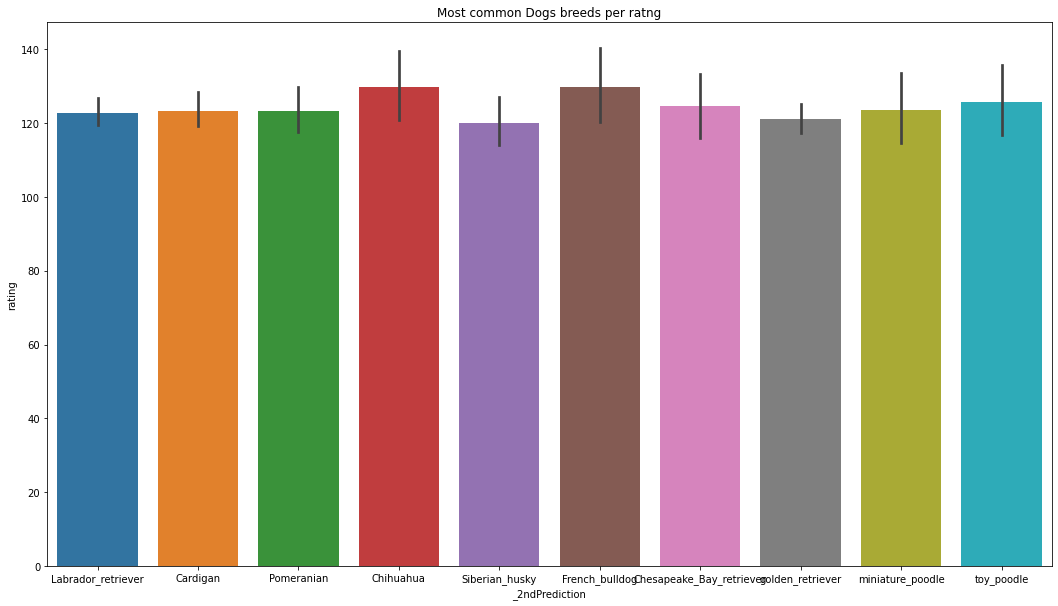

In [68]:
barChart("Most common Dogs breeds per ratng", dfTop10, '_2ndPrediction','rating')

The top 2 rated most common dogs are Chihuahua and French bulldog.

2. Which classification has the highest rating?

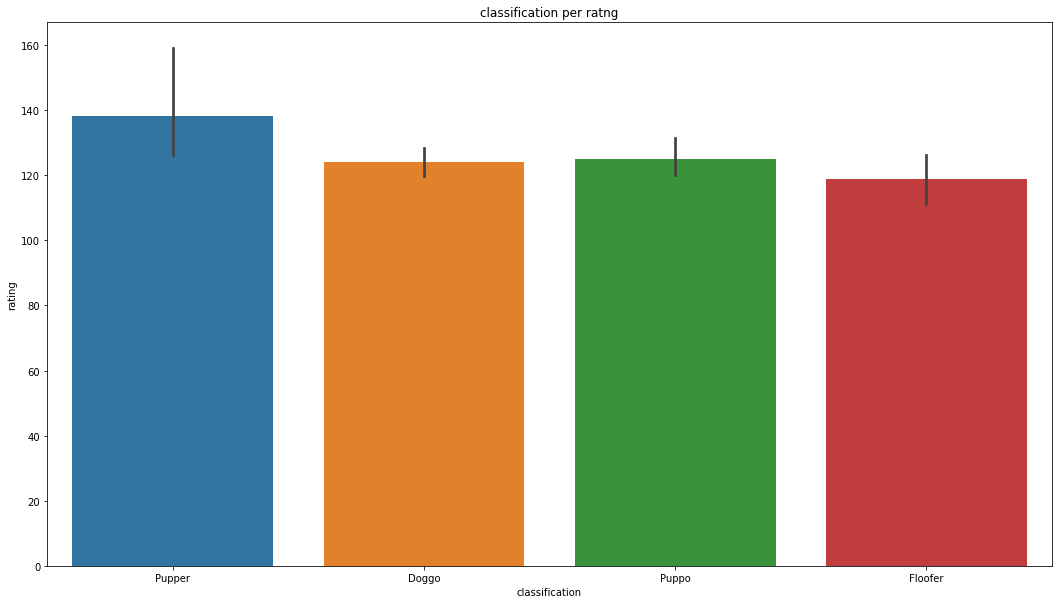

In [69]:
barChart("classification per ratng", df2, 'classification','rating')

The most common classsification, Pupper, has the highest rate.

3. Which most common dogs names are used

In [70]:
sum(df2.name.value_counts())

2006

There are 2006 different names in the dataset. Hence, we will analyze only the top 10 common names

In [71]:
top10ListedNames=np.array(dfBreeds2['name'].value_counts().sort_values(ascending=False).head(10).index)
top10ListedNames

array(['None', 'a', 'Cooper', 'Tucker', 'Oliver', 'Charlie', 'Penny',
       'Sadie', 'the', 'Winston'], dtype=object)

There are some strange names so we will remove them from the list

In [72]:
top10ListedNames=np.array(dfBreeds2['name'].value_counts().sort_values(ascending=False).head(13).index)
top10ListedNames

array(['None', 'a', 'Cooper', 'Tucker', 'Oliver', 'Charlie', 'Penny',
       'Sadie', 'the', 'Winston', 'Toby', 'Lucy', 'Koda'], dtype=object)

In [73]:
top10ListedNames=['Cooper', 'Tucker', 'Oliver', 'Charlie', 'Penny',
       'Sadie', 'Winston', 'Toby', 'Lucy', 'Koda']
top10ListedNames

['Cooper',
 'Tucker',
 'Oliver',
 'Charlie',
 'Penny',
 'Sadie',
 'Winston',
 'Toby',
 'Lucy',
 'Koda']

In [74]:
dfTop10Names=df2[df2['name'].isin(top10ListedNames)]
dfTop10Names.name.head()

10        Koda
15      Oliver
68       Penny
105     Cooper
204    Charlie
Name: name, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

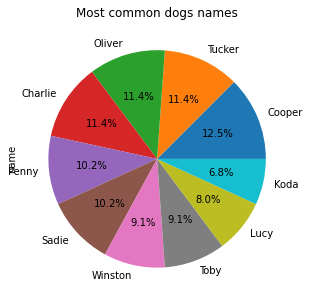

In [75]:
counts=dfTop10Names.name.value_counts()
counts.plot(kind='pie',autopct='%1.1f%%', labels=top10ListedNames,figsize=(5,5))
plt.title("Most common dogs names")
plt.show

The rate of top 10 most common names is almost the same

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>